# Sensors Around NYC

An important part of properly understanding and building models around the SONYC data in places such as annotations.csv, is also getting a grasp on the sensors that are collecting the data. For example, it's helpful to know and visualize where the sensors are actually located on a map, how close they are, how much data was collected by each one, and more.

In [1]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import contextily as ctx
import folium
import plotly_express as px
from folium import plugins
from folium import Map
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from folium.plugins import FloatImage
from shapely.geometry import Point, Polygon
from bokeh.plotting import figure, save

#read in file with sensor data
annotations = pd.read_csv('annotations.csv')

#clean data to only include music presence
annotations = annotations.drop(columns=['annotator_id', '1-1_small-sounding-engine_presence',
       '1-2_medium-sounding-engine_presence',
       '1-3_large-sounding-engine_presence',
       '1-X_engine-of-uncertain-size_presence', '2-1_rock-drill_presence',
       '2-2_jackhammer_presence', '2-3_hoe-ram_presence',
       '2-4_pile-driver_presence',
       '2-X_other-unknown-impact-machinery_presence',
       '3-1_non-machinery-impact_presence', '4-1_chainsaw_presence',
       '4-2_small-medium-rotating-saw_presence',
       '4-3_large-rotating-saw_presence',
       '4-X_other-unknown-powered-saw_presence', '5-1_car-horn_presence',
       '5-2_car-alarm_presence', '5-3_siren_presence',
       '5-4_reverse-beeper_presence',
       '5-X_other-unknown-alert-signal_presence','6-3_ice-cream-truck_presence','7-1_person-or-small-group-talking_presence',
       '7-2_person-or-small-group-shouting_presence',
       '7-3_large-crowd_presence', '7-4_amplified-speech_presence',
       '7-X_other-unknown-human-voice_presence',
       '8-1_dog-barking-whining_presence',
       '1-1_small-sounding-engine_proximity',
       '1-2_medium-sounding-engine_proximity',
       '1-3_large-sounding-engine_proximity',
       '1-X_engine-of-uncertain-size_proximity', '2-1_rock-drill_proximity',
       '2-2_jackhammer_proximity', '2-3_hoe-ram_proximity',
       '2-4_pile-driver_proximity',
       '2-X_other-unknown-impact-machinery_proximity',
       '3-1_non-machinery-impact_proximity', '4-1_chainsaw_proximity',
       '4-2_small-medium-rotating-saw_proximity',
       '4-3_large-rotating-saw_proximity',
       '4-X_other-unknown-powered-saw_proximity', '5-1_car-horn_proximity',
       '5-2_car-alarm_proximity', '5-3_siren_proximity',
       '5-4_reverse-beeper_proximity',
       '5-X_other-unknown-alert-signal_proximity',
       '6-1_stationary-music_proximity', '6-2_mobile-music_proximity',
       '6-3_ice-cream-truck_proximity',
       '6-X_music-from-uncertain-source_proximity',
       '7-1_person-or-small-group-talking_proximity',
       '7-2_person-or-small-group-shouting_proximity',
       '7-3_large-crowd_proximity', '7-4_amplified-speech_proximity',
       '7-X_other-unknown-human-voice_proximity',
       '8-1_dog-barking-whining_proximity', '1_engine_presence',
       '2_machinery-impact_presence', '3_non-machinery-impact_presence',
       '4_powered-saw_presence', '5_alert-signal_presence', '7_human-voice_presence','8_dog_presence']).groupby(['split', 'sensor_id', 'audio_filename', 'borough',
       'block', 'latitude', 'longitude', 'year', 'week', 'day', 'hour']).sum()>0
annotations = annotations.reset_index()
annotations = annotations[annotations['6_music_presence'] == True] 
annotations.head()

,split,sensor_id,audio_filename,borough,block,latitude,longitude,year,week,day,hour,6-1_stationary-music_presence,6-2_mobile-music_presence,6-X_music-from-uncertain-source_presence,6_music_presence
18,test,1,01_026900.wav,1,541,40.73033,-73.99870,2019,31,3,19,False,False,False,True
25,test,1,01_027042.wav,1,541,40.73033,-73.99870,2019,35,3,20,False,True,False,True
30,test,1,01_027635.wav,1,541,40.73033,-73.99870,2019,44,2,20,True,False,False,True
58,test,4,04_027085.wav,1,535,40.72898,-73.99629,2019,41,1,14,True,False,False,True
82,test,5,05_026915.wav,3,142,40.69398,-73.98697,2019,34,1,17,False,False,False,True


In [2]:
#create geopandas dataframe that has coordinate system and converts long/lat columns into single column
sensors = gpd.GeoDataFrame(
    annotations, crs={'init': 'epsg:4326'}, geometry = gpd.points_from_xy(annotations.longitude, annotations.latitude))

#display new dataframe
sensors.head()


/home/dhz220/miniconda3/envs/py36/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



,split,sensor_id,audio_filename,borough,block,latitude,longitude,year,week,day,hour,6-1_stationary-music_presence,6-2_mobile-music_presence,6-X_music-from-uncertain-source_presence,6_music_presence,geometry
18,test,1,01_026900.wav,1,541,40.73033,-73.99870,2019,31,3,19,False,False,False,True,POINT (-73.99870 40.73033)
25,test,1,01_027042.wav,1,541,40.73033,-73.99870,2019,35,3,20,False,True,False,True,POINT (-73.99870 40.73033)
30,test,1,01_027635.wav,1,541,40.73033,-73.99870,2019,44,2,20,True,False,False,True,POINT (-73.99870 40.73033)
58,test,4,04_027085.wav,1,535,40.72898,-73.99629,2019,41,1,14,True,False,False,True,POINT (-73.99629 40.72898)
82,test,5,05_026915.wav,3,142,40.69398,-73.98697,2019,34,1,17,False,False,False,True,POINT (-73.98697 40.69398)


## Basic Sensor Location Map Using matplotlib

I first created this map to get a very basic understanding of sensor locations and get used to using geospatial data visualization tools. It is basic however and only provides points where the sensors are located, but not much other information.

(40.675, 40.8)

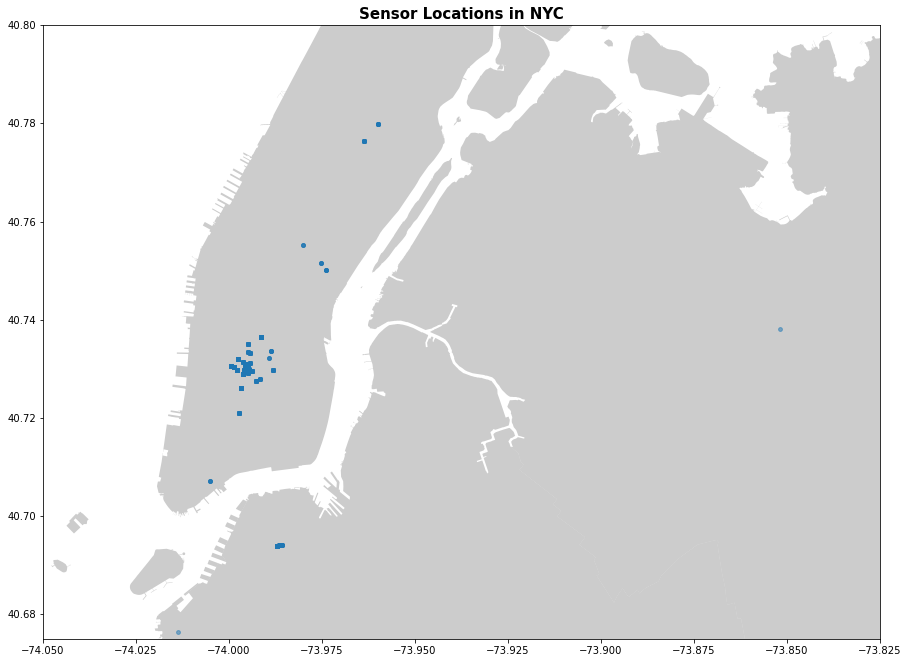

In [3]:
#create figure and axes
fig, ax = plt.subplots(figsize=(15,15))

#read in shapefile that has NYC map from https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
street_map = gpd.read_file('geo_export_ed8cec48-9970-4d0b-8fa3-0940d8a4a8d4.shp')

#set shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4, color='gray')

#add geodataframe created earlier
sensors.plot(ax=ax, alpha = 0.5, legend=True, markersize=15)

#set title, and restrict coordinates for better display
plt.title('Sensor Locations in NYC', fontsize=15,fontweight='bold')
plt.xlim(-74.05,-73.825)
plt.ylim( 40.675,40.8)

## Create a Heatmap of Music Presence

This map is meant to give us a better idea of where the most music is occurring. Areas with darker red or yellowish spots in the middle indicate that there is a high frequency of recorded music samples.

In [4]:
# create empty NYC map
heatmap = Map(location=[40.693943, -74.025], zoom_start =12)

#create heatmap and set various attributes
hm = HeatMap(
    list(zip(sensors.latitude.values, sensors.longitude.values)),
    min_opacity=0.2,
    radius=10, 
    blur=13,
    max_zoom=1,
)


#add heatmap layer to empty NYC map
heatmap.add_child(hm)



The dataframe used for the maps above listed each piece of data separately, but I needed to know the counts per sensor in order to play around with some other map ideas.

In [5]:
#create dataframe that is grouped by sensor and counts occurence of music presence for each one
sensors2 = annotations.groupby(['sensor_id','latitude','longitude'])['6_music_presence'].count().reset_index()

#convert to geo dataframe and create geometry column with lat/long
sensors2 = gpd.GeoDataFrame(
    sensors2, crs={'init': 'epsg:4326'}, geometry = gpd.points_from_xy(sensors2.longitude, sensors2.latitude))

#display
sensors2.head()

/home/dhz220/miniconda3/envs/py36/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



,sensor_id,latitude,longitude,6_music_presence,geometry
0,0,40.72951,-73.99388,12,POINT (-73.99388 40.72951)
1,1,40.73033,-73.99870,127,POINT (-73.99870 40.73033)
2,2,40.73118,-73.99443,23,POINT (-73.99443 40.73118)
3,3,40.72750,-73.99286,28,POINT (-73.99286 40.72750)
4,4,40.72898,-73.99629,44,POINT (-73.99629 40.72898)


## Create a Clustered Map of Sensors

This map was able to achieve a combination of the two maps above. It clusters sensor markers that are close together to help give you an idea of where there are more sensors, but as you zoom in each marker becomes their own individual and you can actually click on the marker to get a popup that gives you the sensor number, as well as the music count associated with it.

In [6]:
# create empty NYC map
circlemap = folium.Map(location=[40.693943, -74.025], zoom_start =12)
 
# add marker for each sensor, use a clustered view (zoom in to see individual sensors)
# added labels for each sensor which displays the sensor number and the counted occurence for music
mc = MarkerCluster()
for index,row in sensors2.iterrows():
        mc.add_child(folium.Marker(location=[str(row['latitude']),str(row['longitude'])], 
        tooltip='Sensor Id',popup = 'Sensor: ' + str(row['sensor_id']) + '\n Presence: '+  str(row['6_music_presence']),                    
        clustered_marker =True))
    
# add marker cluster layer to empty map
circlemap.add_child(mc)

## Work in Progress




In [7]:
sensors2 = annotations.groupby(['sensor_id','latitude','longitude'])['6_music_presence'].count().reset_index()

sensors2 = gpd.GeoDataFrame(
    sensors2, crs={'init': 'epsg:4326'}, geometry = gpd.points_from_xy(sensors2.longitude, sensors2.latitude))
sensors2['geometry'] = sensors2['geometry'].centroid
sensors2.to_file('Sensors.shp')
sensors_shp= gpd.read_file('Sensors.shp')
sensors_shp.head()


/home/dhz220/miniconda3/envs/py36/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6

/home/dhz220/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




,sensor_id,latitude,longitude,6_music_pr,geometry
0,0,40.72951,-73.99388,12,POINT (-73.99388 40.72951)
1,1,40.73033,-73.99870,127,POINT (-73.99870 40.73033)
2,2,40.73118,-73.99443,23,POINT (-73.99443 40.73118)
3,3,40.72750,-73.99286,28,POINT (-73.99286 40.72750)
4,4,40.72898,-73.99629,44,POINT (-73.99629 40.72898)


In [ ]:
#attempt to create a bubble map or something

fig2, ax2 = plt.subplots(figsize=(16,16))
street_map.plot(ax=ax, alpha=0.4, color='gray')
fig2 = px.scatter_mapbox(
                        sensors_shp, 
                        lat=sensors_shp.geometry.y, 
                        lon=sensors_shp.geometry.x, 
                        size='6_music_pr', 
                        color='sensor_id', 
                        hover_name = 'sensor_id',
                        color_continuous_scale = px.colors.colorbrewer.Reds,  
                        size_max=15, 
                        zoom=10
                    )
fig2.show()


In [ ]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
from bokeh.palettes import brewer
from bokeh.io.doc import curdoc
from bokeh.models import Slider, HoverTool, Select
from bokeh.layouts import widgetbox, row, column

nyc = gpd.read_file('Borough Boundaries.geojson')
nyc.crs = {'init': 'epsg:4326'}
nyc.head()

In [ ]:
boroughs = gpd.read_file(gpd.datasets.get_path('nybb'))
boroughs = boroughs.to_crs(epsg=3857)


       
ax1 = boroughs.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)


sensors.plot(ax=ax1, alpha = 0.5, legend=True, markersize=10)

plt.show()

In [11]:
center = (40.749940, -73.937123)
m = Map(center=center, zoom=15)
display(m)

for index,row in annotations.iterrows():
    marker=Marker(location=[row.loc['latitude'],row.loc['longitude']])
    m.add_layer(marker)


TypeError: parse_options() got multiple values for keyword argument 'zoom'

In [ ]:
list(zip(sensors.latitude.values, sensors.longitude.values))

In [15]:
heatmapwtime = Map(location=[40.693943, -74.025], zoom_start =12)

sensors['latitude'] = sensors['latitude'].astype(float)
sensors['longitude'] = sensors['longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs

heat_df = sensors[['latitude', 'longitude']]

# Create weight column, using date
heat_df['weight'] = sensors['year']
heat_df['weight'] = heat_df['weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['latitude','longitude', 'weight'])

# List comprehension to make out list of lists
heat_data = [[[row['latitude'],row['longitude']] for index, row in heat_df[heat_df['weight'] == i].iterrows()]]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(heatmapwtime)
# Display the map
heatmapwtime

/home/dhz220/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/dhz220/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



NameError: name 'i' is not defined